# Projet final - Répartition Hommes / Femmes par département, âge et niveau.

In [233]:
# Importation des bibliothèques

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [235]:
# Chargement du dataset

df = pd.read_csv(r"C:\Users\Amen\Desktop\DATA ANALYST\Module 6 - Projet final\5000 HRA Records.csv")

### Analyse exploratoire & préparation des données

In [237]:
# Aperçu des lignes
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,48,Yes,Non-Travel,403,Human Resources,30,5,Other,1,1,...,2,80,1,26,5,1,7,5,4,2
1,40,No,Travel_Rarely,1433,Human Resources,46,3,Technical Degree,1,2,...,2,80,3,18,6,2,10,4,1,5
2,22,No,Travel_Frequently,1259,Support,45,1,Marketing,1,3,...,3,80,4,34,5,2,25,19,24,25
3,24,No,Non-Travel,1218,Software,8,3,Human Resources,1,4,...,1,80,3,39,6,3,11,10,8,11
4,41,No,Travel_Rarely,987,Software,43,3,Medical,1,5,...,2,80,2,7,4,1,5,5,2,5


In [239]:
# Information générales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       5000 non-null   int64 
 1   Attrition                 5000 non-null   object
 2   BusinessTravel            5000 non-null   object
 3   DailyRate                 5000 non-null   int64 
 4   Department                5000 non-null   object
 5   DistanceFromHome          5000 non-null   int64 
 6   Education                 5000 non-null   int64 
 7   EducationField            5000 non-null   object
 8   EmployeeCount             5000 non-null   int64 
 9   EmployeeNumber            5000 non-null   int64 
 10  EnvironmentSatisfaction   5000 non-null   int64 
 11  Gender                    5000 non-null   object
 12  HourlyRate                5000 non-null   int64 
 13  JobInvolvement            5000 non-null   int64 
 14  JobLevel                

**Informations générales**

Le fichier contient 35 colonnes et 5000 lignes.
Il y a deux types de colonne, int64 (nombres entiers) et object (texte).

On va supprimer 4 colonnes dont les informations sont inutiles pour l'analyse ("Over18", "EmployeeCount", "StandardHours", "EmployeeNumber").

- Les colonnes "Gender" et "OverTime" seront en format binaire.
- La colonne "TrancheAge" sera ajoutée et en catégorie.
- La colonne "Ville" sera ajoutée en type object.
- Les colonnes "Education", "EnvironnementSatisfaction", "JobInvolvement", "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction", "WorkLifeBalance" qui sont codées de 1 à 4 ou 1 à 5 seront transformées en libellés clairs pour faciliter la lecture.

In [241]:
# Copie du dataset original

df_clean = df.copy()

In [243]:
# Suppression des colonnes inutiles

df_clean.drop(columns=["Over18", "EmployeeCount", "StandardHours", "EmployeeNumber"], inplace=True)

In [245]:
# Remplacement des valeurs binaires par des libellés lisibles

df_clean["Gender"] = df_clean["Gender"].map({"Male": "Homme", "Female": "Femme"})
df_clean["OverTime"] = df_clean["OverTime"].map({"Yes": 1, "No": 0})

In [247]:
# Création colonne TrancheAge
# 18-30 = Jeune, 31-45 = Adulte, 46-60 = Senior

df_clean["TrancheAge"] = pd.cut(df_clean["Age"], bins=[17, 30, 45, 60], labels=["Jeune", "Adulte", "Senior"])

In [249]:
# Création colonne Ville

df_clean["Ville"] = df_clean["Department"].map({
    "Research & Development" : "Paris",
    "Sales" : "Lyon",
    "Human Resources" : "Marseille",
    "Hardware" : "Lille",
    "Software" : "Nantes",
    "Support" : "Grenoble",
})

In [251]:
# Mapping des variables codées

df_clean["Education"] = df_clean["Education"].map({1: "Below College", 2: "College", 3: "Bachelor", 4: "Master", 5: "Doctor"})
df_clean["EnvironmentSatisfaction"] = df_clean["EnvironmentSatisfaction"].map({1: "Low", 2: "Medium", 3: "High", 4: "Very High"})
df_clean["JobInvolvement"] = df_clean["JobInvolvement"].map({1: "Low", 2: "Medium", 3: "High", 4: "Very High"})
df_clean["JobSatisfaction"] = df_clean["JobSatisfaction"].map({1: "Low", 2: "Medium", 3: "High", 4: "Very High"})
df_clean["PerformanceRating"] = df_clean["PerformanceRating"].map({1: "Bad", 2: "Good", 3: "Excellent", 4: "Outstanding"})
df_clean["RelationshipSatisfaction"] = df_clean["RelationshipSatisfaction"].map({1: "Low", 2: "Medium", 3: "High", 4: "Very High"})
df_clean["WorkLifeBalance"] = df_clean["WorkLifeBalance"].map({1: "Bad", 2: "Better", 3: "Good", 4: "Best"})

In [253]:
# Aperçu
print("Aperçu des données nettoyées :")
df_clean.head()

Aperçu des données nettoyées :


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TrancheAge,Ville
0,48,Yes,Non-Travel,403,Human Resources,30,Doctor,Other,Very High,Homme,...,1,26,5,Bad,7,5,4,2,Senior,Marseille
1,40,No,Travel_Rarely,1433,Human Resources,46,Bachelor,Technical Degree,Low,Femme,...,3,18,6,Better,10,4,1,5,Adulte,Marseille
2,22,No,Travel_Frequently,1259,Support,45,Below College,Marketing,High,Femme,...,4,34,5,Better,25,19,24,25,Jeune,Grenoble
3,24,No,Non-Travel,1218,Software,8,Bachelor,Human Resources,Very High,Homme,...,3,39,6,Good,11,10,8,11,Jeune,Nantes
4,41,No,Travel_Rarely,987,Software,43,Bachelor,Medical,Medium,Femme,...,2,7,4,Bad,5,5,2,5,Adulte,Nantes


In [255]:
# Nombre de colonnes et lignes
df_clean.shape

(5000, 33)

In [257]:
# Statistiques descriptives
df_clean.describe().round(3)

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,5000.000,5000.000,5000.000,5000.000,5000.00,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.00,5000.000
mean,39.069,805.026,25.226,114.139,3.00,25956.396,407601.723,3.977,0.492,24.366,2.498,20.532,3.508,10.709,5.872,5.88,5.891
std,12.276,404.233,14.498,49.664,1.42,14344.074,337577.524,2.606,0.500,14.398,1.115,11.428,1.686,8.861,5.902,6.05,6.043
min,18.000,100.000,1.000,30.000,1.00,1003.000,1054.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.00,1.000
25%,28.000,454.000,12.000,71.000,2.00,13524.250,130087.500,2.000,0.000,12.000,1.000,11.000,2.000,3.000,2.000,1.00,1.000
50%,39.000,799.000,25.000,115.000,3.00,25888.000,317115.000,4.000,0.000,24.000,3.000,20.500,4.000,8.000,4.000,4.00,4.000
75%,50.000,1163.000,38.000,157.000,4.00,38451.000,606925.250,6.000,1.000,37.000,3.000,30.000,5.000,16.000,8.000,8.00,8.000
max,60.000,1500.000,50.000,200.000,5.00,50986.000,1502250.000,8.000,1.000,49.000,4.000,40.000,6.000,40.000,35.000,39.00,40.000


### Statistiques descriptives

- **Age** : Entre 18 et 60 ans, une moyenne de 39 ans.
- **MonthlyIncome** : Salaire brut minimum de 1 003€ et maximum de 50 986€, il y a des outliers.
- **YearsAtCompany** : Entre 0 et 40 ans et une moyenne de 10 ans.
- **TrainingTimesLastYear** : 0 à 6 formations et une médiane de 3.
- **NumCompaniesWorked** : Les salariés ont travaillé pour 9 entreprises et une moyenne de 2,6.
- **PercentSalaryHike** : Hausse de salaire en moyenne de 24% et un maximum de 49%.
- **YearsWithCurrManager** : Parfois jusqu'à 40 ans avec le même manager.

---

**Conclusion** : 
Des valeurs extrêmes existent dans plusieurs variables (exemple : salaire > 40 000€, ancienneté = 40 ans), mais restent plausibles dans une grande base RH.

### Valeurs aberrantes

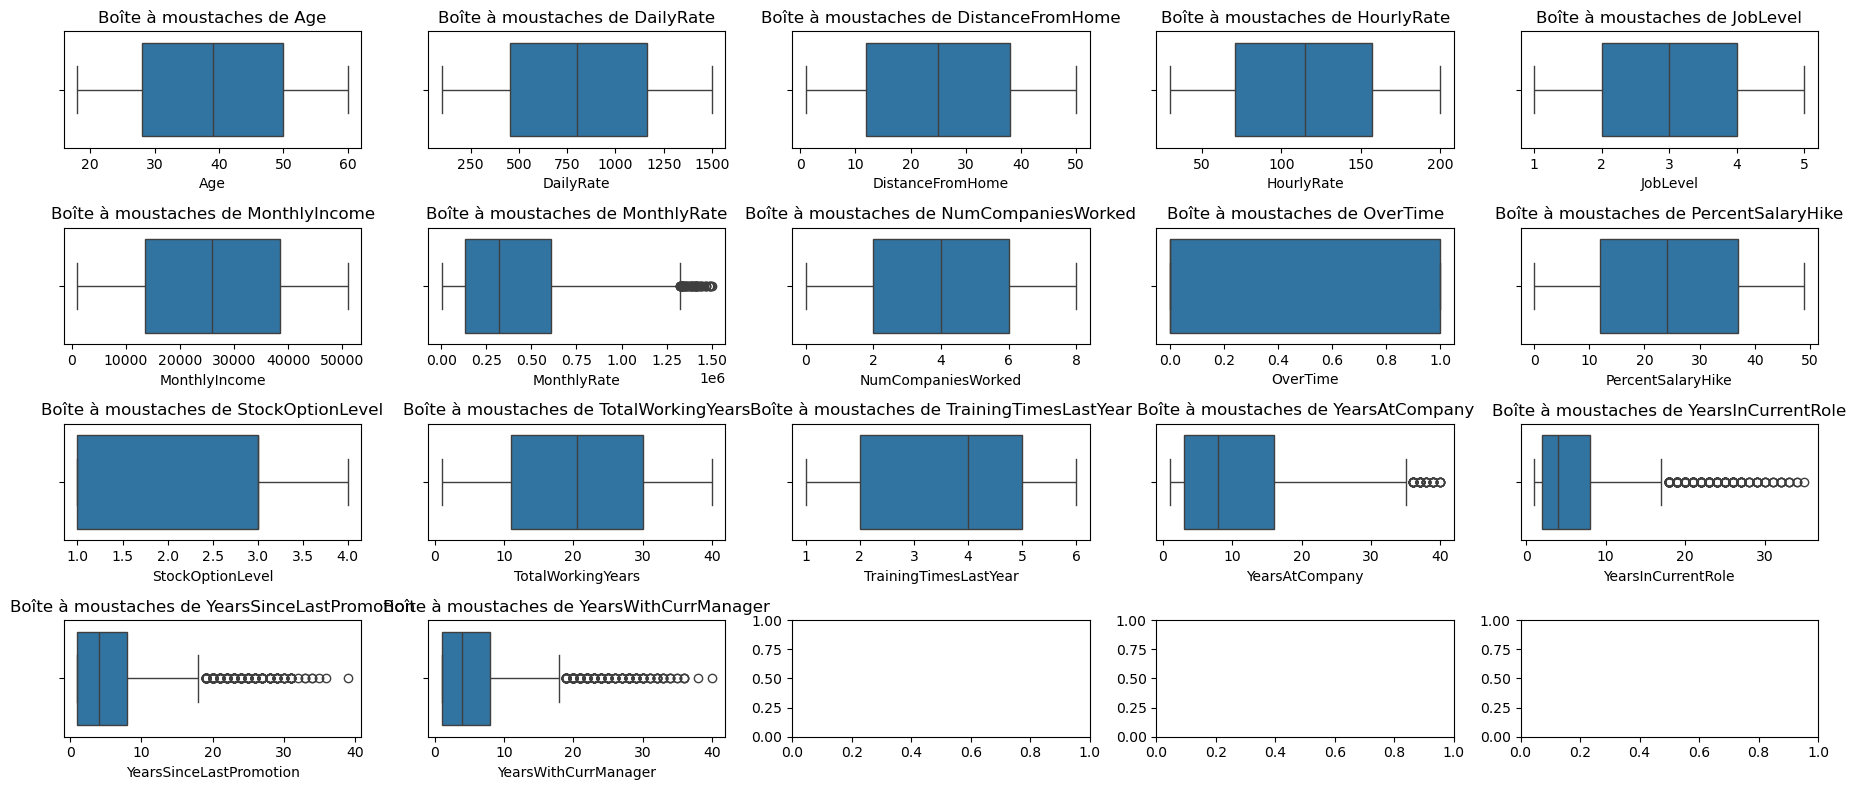

In [259]:
# Crée une figure 
fig, axes = plt.subplots(4, 5, figsize=(18, 8))  # 6 rangées, 5 colonnes, grande taille pour mieux voir

# Liste des 9 colonnes à tracer
cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Boucle sur les colonnes et les axes 
for ax, col in zip(axes.flatten(), cols):
    sns.boxplot(x=df_clean[col], ax=ax)  # Trace le boxplot dans l'axe correspondant
    ax.set_title(f'Boîte à moustaches de {col}')  # Met un titre avec le nom de la colonne

plt.tight_layout()  # Ajuste bien l'espace entre les graphiques
plt.show()  # Affiche le tout

### Analyses des boîtes à moustaches

- **Age** : L'âge des employés varie entre 18 et 60 ans avec une moyenne autour 39 ans. La majorité des employés a entre 28 et 50 ans ce qui montre une population active expérimentée. Il n'y a pas de valeur aberrante à corriger ici.
- **MonthlyIncome** : Le salaire mensuel brut varie entre 1 003 et 50 986. La moyenne est de 25 956 mais certains salaires sont très élevés. Ces hauts revenus peuvent être liés à des postes à haute responsabilité ou une grande ancienneté. Ce sont des outliers plausibles.
- **DistanceFromHome** : Les distances domicile-travail varient entre 1 et 50 km avec une médiane à 25 km. Cela montre une certaine mobilité mais pas de valeur aberrante.
- **NumCompaniesWorked** : Certains employés ont travaillé jusqu'à 9 entreprises différentes. Une moyenne d'environ 2.6 ce qui reflète une rotation modérée. Des cas extrêmes sont visibles mais pas nécessairement anormaux dans une carrière longue.
- **TotalWorkingYears** et **YearsAtCompany** : L'expérience totale peut atteindre 40 ans avec 11 ans en moyenne. La durée dans l'entreprise actuelle va jusqu'à 40 ans aussi ce qui est cohérent. Ces valeurs élevées sont logiques pour les profils seniors et ne sont pas supprimées.
- **TrainingTimesLastYear** : Le nombre de formations suivies varie entre 0 et 6 avec une médiane à 3 formations. Cela montre un effort de formation modéré dans l'entreprise. Pas de valeur aberrante ici non plus.
- **PercentSalaryHike** : Les augmentations de salaire vont de 0% à 49% avec une moyenne de 24%. Des hausses élevées peuvent s'expliquer par des promotions, performances exceptionnelles ou politiques RH ponctuelles.
- **YearsWithCurrManager** : Les employés peuvent rester jusqu'à 40 ans sous le même manager ce qui est exceptionnel. La moyenne est autout de 6 ans ce qui reste cohérent avec la fidélité professionnelle.

---

Aucune valeur n'a été supprimée.
Les valeurs extrêmes observées (revenu, ancienneté, nombre d'entreprises) restent **plausibles** dans le contexte RH et enrichissent l'analyse. Elles seront prises en compte dans les visualisations et les croisements avec l'âge, le genre et le département.

### Matrice de corrélation

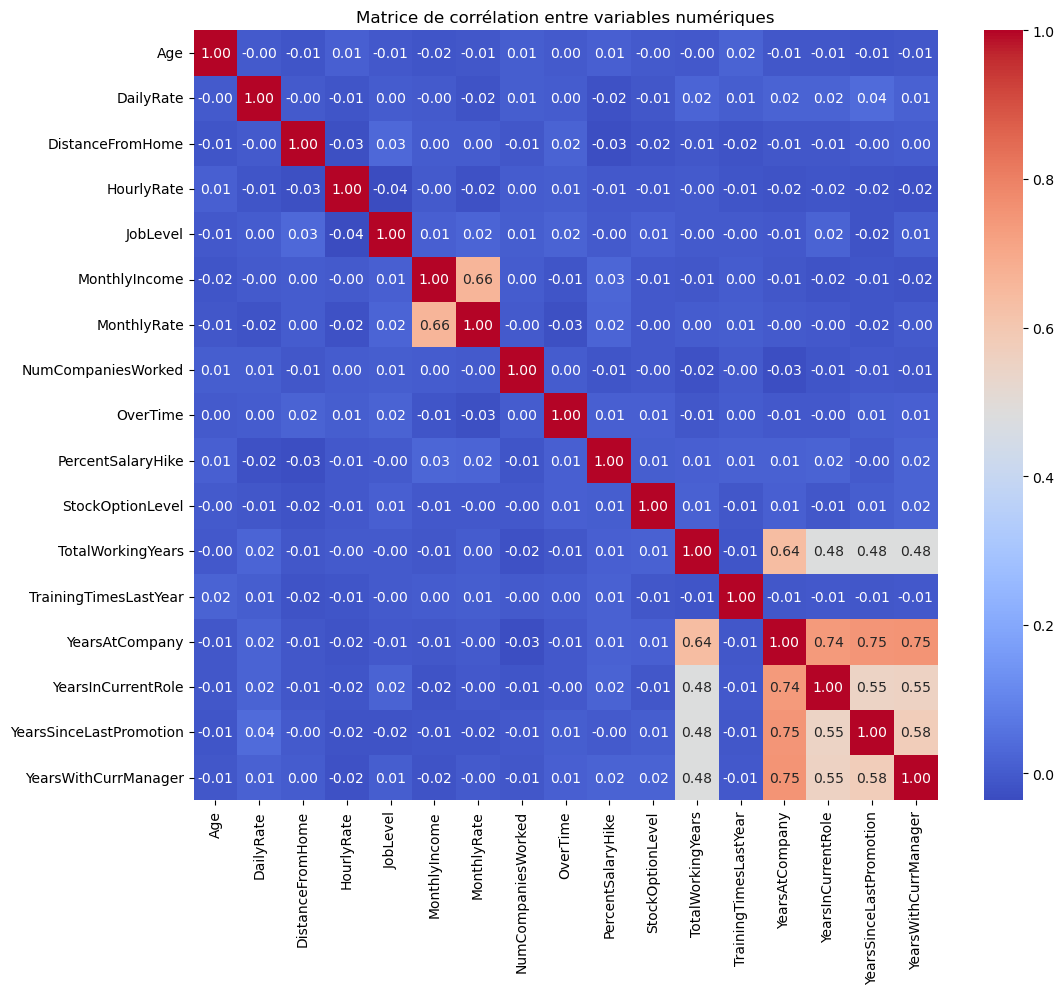

In [261]:
plt.figure(figsize=(12,10))
sns.heatmap(df_clean.select_dtypes(include="number").corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation entre variables numériques")
plt.show()

### Interprétation de la matrice de corrélation

#### Corrélations fortes :
- **TotalWorkingYears & YearsAtCompany** (0.64)
  > Un lien logique : plus un employé à d'expérience, plus il a d'annéess dans son entreprise.
- **YearsAtCompany & YearsInCurrentRole** (0.76)
  > Les années passées dans l'entreprise influencent la durée dans le même poste.
- **YearsAtCompany & YearsWithCurrManager** (0.75)
  > Cela peut indiquer une **fidélité managériale** ou une faible mobilité interne.
- **MonthlyIncome & JobLevel** (0.62)
  > Plus le niveau hiérarchique est élevé, plus le salaire augmente.

#### Corrélations modérées :
- **MonthlyIncome & TotalWorkingYears** (0.48)
  > Plus d'expérience = meilleurs rémunérations.
- **YearsWithCurrManager & YearsInCurrentRole** (0.55)
  > Quand un manager ne change pas, les employés restent aussi dans leur rôle.

#### Corrélations faibles ou nulles :
- La majorité des autres variables sont faiblement corrélées (en bleu), ce qui indique :
  - peu de redondance,
  - une diversité des facteurs analysés,
  - un jeu de données équilibré.

---

### Conclusion :

Aucune corrélation excessive (supérieur à 0.85) n'indique de problème de multicolinéarité.
Les variables peuvent être utilisées ensemble pour l'analyse ou la modélisation sans risque.

### Export du dataset

In [263]:
df_clean.to_csv("dataset_rh_analyse_complet.csv", index=False)
df_clean.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TrancheAge,Ville
0,48,Yes,Non-Travel,403,Human Resources,30,Doctor,Other,Very High,Homme,...,1,26,5,Bad,7,5,4,2,Senior,Marseille
1,40,No,Travel_Rarely,1433,Human Resources,46,Bachelor,Technical Degree,Low,Femme,...,3,18,6,Better,10,4,1,5,Adulte,Marseille
2,22,No,Travel_Frequently,1259,Support,45,Below College,Marketing,High,Femme,...,4,34,5,Better,25,19,24,25,Jeune,Grenoble
3,24,No,Non-Travel,1218,Software,8,Bachelor,Human Resources,Very High,Homme,...,3,39,6,Good,11,10,8,11,Jeune,Nantes
4,41,No,Travel_Rarely,987,Software,43,Bachelor,Medical,Medium,Femme,...,2,7,4,Bad,5,5,2,5,Adulte,Nantes
